# Install the code dependencies

In [1]:
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 259.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 254.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 198.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 296.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 329.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 290.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 298.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 294.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 290.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 276.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 261.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Download the data set and split it into test and training data sets

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Each training iteration will be passed 4 images
# Larger batch size means we'll need to fit more data in memory, it also means we'll be able to parallelize more and get through all of the training data faster
# Smaller batch sizes result in the overall model parameters being updated more frequently, so there are more opportunities for the model to learn from the previous batches.
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2) #Shuffle the training data so that the model doesn't learn patterns that just happen to be in the training data set

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


# Print a random sample of the training data

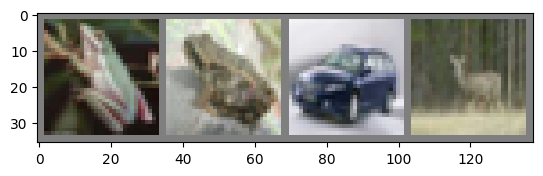

frog  frog  car   deer 


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Function to print an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Pick the first set of images and corresponding labels from the training data set
# Because the trainloader uses the "shuffle=True" argument, we'll get a different batch every time.
# The number of images that will be printed is determined by the "batch_size = 4" line above.
dataiter = iter(trainloader)
images, labels = next(dataiter)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Show the images
imshow(torchvision.utils.make_grid(images))
# Print the corresponding labels for each of the images that we'll print out
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Define the neural network

It's difficult to talk through what's going on this code without more time. If you want to dig in here to understand what is going on, I recommend reading more [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) and also watching [this video series](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=CfGsmkH9siwYFNHl).

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# Define the loss function

A loss function answers the question of "how far is the model's outupt from the 'correct' answer?"

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the model

In [11]:
number_of_epochs = 2 # How many times to loop through the training data. The model can get better the more you train it, but there are limits and caveats
for epoch in range(number_of_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): # Loop through all of the training data
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.214
[1,  4000] loss: 1.907
[1,  6000] loss: 1.708
[1,  8000] loss: 1.608
[1, 10000] loss: 1.536
[1, 12000] loss: 1.492
[2,  2000] loss: 1.427
[2,  4000] loss: 1.406
[2,  6000] loss: 1.387
[2,  8000] loss: 1.333
[2, 10000] loss: 1.350
[2, 12000] loss: 1.307
Finished Training


Credit to [this tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for this code.